In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
df0 = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [69]:
df0.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [70]:
# Since 'Survived' column comes in between, we move it to the end to later merge test info, 
# so that we perform our transofrmations, etc before splitting them back and storing them
df2 = df0[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
           'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']] 

In [71]:
df = pd.concat([df2,df1],sort=False)

In [72]:
df.shape

(1309, 12)

In [73]:
df.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0       0.0  
1       1.0  
2       1.0  
3       1.0  
4       0.0

In [74]:
df.to_csv('Titanic_merged.csv') # Checking the overall output and contents

In [75]:
print("The shape of the MERGED DataFrame is (rows, columns) :",df.shape)
print('\n')
print(df.info())
print(df2.info())
print(df1.info())
print('\n')
print(df.describe())


The shape of the MERGED DataFrame is (rows, columns) : (1309, 12)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Survived       891 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          

1    323
2    277
3    709
Name: Pclass, dtype: int64


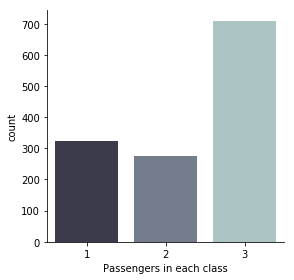

In [142]:
# Let's check what are the values in each of the columns
print(df['Pclass'].value_counts().sort_index())  # There were overall three classes of passengers
fg = sns.factorplot('Pclass',data=df,kind='count',palette='bone')
fg.set(xlabel='Passengers in each class')

# Signature: sns.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, 
#                           col_wrap=None, estimator=<function mean at 0x10e5bd6a8>, ci=95, n_boot=1000, units=None, 
#                           order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, 
#                           aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, 
#                           sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

In [77]:
df['Name'].value_counts().sort_values(ascending=False)

Connolly, Miss. Kate                                          2
Kelly, Mr. James                                              2
Crosby, Miss. Harriet R                                       1
Maisner, Mr. Simon                                            1
Klasen, Mr. Klas Albin                                        1
Madill, Miss. Georgette Alexandra                             1
Wells, Miss. Joan                                             1
Coleff, Mr. Satio                                             1
Stanley, Miss. Amy Zillah Elsie                               1
Thayer, Mr. John Borland Jr                                   1
Petranec, Miss. Matilda                                       1
Pallas y Castello, Mr. Emilio                                 1
McKane, Mr. Peter David                                       1
Hakkarainen, Mr. Pekka Pietari                                1
Markoff, Mr. Marin                                            1
Ford, Mr. Edward Watson                 

male      843
female    466
Name: Sex, dtype: int64


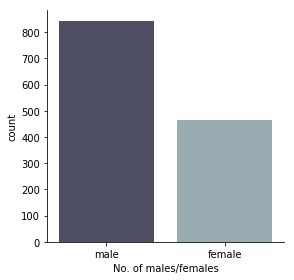

In [143]:
print(df['Sex'].value_counts()) # How many male and female were there, but we see there's no children listed here
fa = sns.factorplot('Sex',data=df,kind='count',palette='bone')
fa.set(xlabel='No. of males/females')

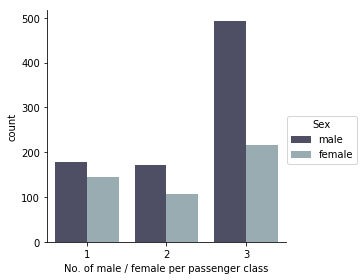

In [164]:
# No. of males and females in each passenger class
gp = df.groupby(['Sex','Pclass'])['Sex'].count()
fg = sns.factorplot('Pclass',data=df,hue='Sex',kind='count',palette='bone')
fg.set(xlabel='No. of male / female per passenger class')

0.17      1
0.33      1
0.42      1
0.67      1
0.75      3
0.83      3
0.92      2
1.00     10
2.00     12
3.00      7
4.00     10
5.00      5
6.00      6
7.00      4
8.00      6
9.00     10
10.00     4
11.00     4
11.50     1
12.00     3
13.00     5
14.00     8
14.50     2
15.00     6
16.00    19
17.00    20
18.00    39
18.50     3
19.00    29
20.00    23
         ..
46.00     6
47.00    14
48.00    14
49.00     9
50.00    15
51.00     8
52.00     6
53.00     4
54.00    10
55.00     8
55.50     1
56.00     4
57.00     5
58.00     6
59.00     3
60.00     7
60.50     1
61.00     5
62.00     5
63.00     4
64.00     5
65.00     3
66.00     1
67.00     1
70.00     2
70.50     1
71.00     2
74.00     1
76.00     1
80.00     1
Name: Age, Length: 98, dtype: int64


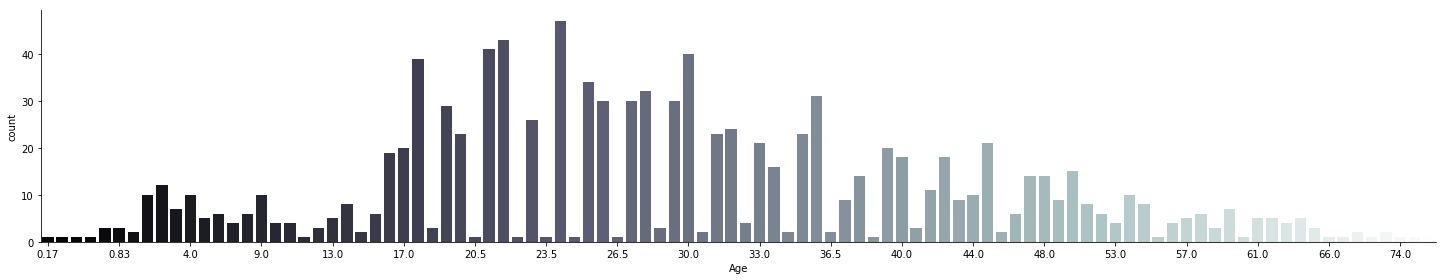

In [79]:
print(df['Age'].value_counts().sort_index())
g = sns.factorplot('Age',data=df,kind='count',palette='bone',aspect=5)
g.set_xticklabels(step=5)

0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: SibSp, dtype: int64


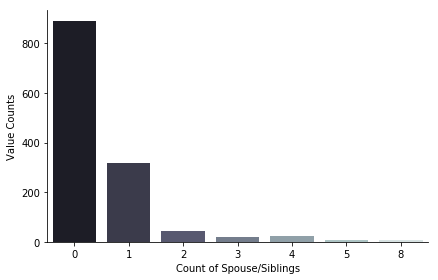

In [80]:
print(df['SibSp'].value_counts().sort_index())# The number of Siblings or spouse info, i.e. 891 folks had no siblings or spouse
f = sns.factorplot('SibSp',data=df,kind='count',palette='bone',aspect=1.5)
f.set(xlabel='Count of Spouse/Siblings',ylabel='Value Counts')

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parch, dtype: int64


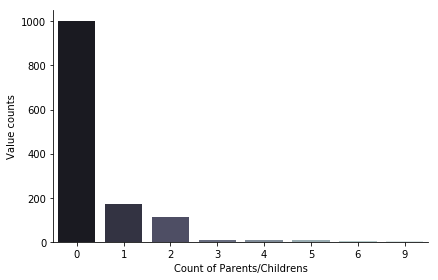

In [81]:
print(df['Parch'].value_counts().sort_index()) # Number of parents / children aboard the Titanic
h = sns.factorplot('Parch',data=df,kind='count',palette='bone',aspect=1.5)
h.set(xlabel='Count of Parents/Childrens',ylabel='Value counts')

Survived  Sex   
0.0       female     81
          male      468
1.0       female    233
          male      109
Name: Sex, dtype: int64


Sex      female                                                     ...    \
Embarked      C                     Q                      S        ...     
Pclass        1    2     3          1    2     3           1     2  ...     
Survived                                                            ...     
0.0         1.0  0.0   8.0   NaN  0.0  0.0   9.0   NaN   2.0   6.0  ...     
1.0        43.0  7.0  15.0   NaN  2.0  2.0  24.0   NaN  46.0  61.0  ...     
All         NaN  NaN   NaN  74.0  NaN  NaN   NaN  37.0   NaN   NaN  ...     

Sex       male                                    All                      
Embarked     Q           S                                                 
Pclass       3           1     2      3             1     2      3         
Survived                                                                   
0.0       36.0   NaN  51.0  82.0  231.0    NaN   80.0  97.0  372.0    NaN  
1.0        3.0   NaN  28.0  15.0   34.0    NaN  136.0  87.0  119.0    NaN  
All        NaN  41.0   NaN   NaN    NaN  441.0    NaN   NaN    NaN  891.0  

[3 rows x 28 columns]

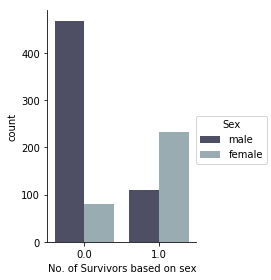

In [183]:
# No. of survivors based on sex
print(df.groupby(['Survived','Sex'])['Sex'].count())
fg = sns.factorplot('Survived',data=df,hue='Sex',kind='count',palette='bone',aspect=.7)
fg.set(xlabel='No. of Survivors based on sex')

table = pd.crosstab(index=[df.Survived,df.Pclass],columns=[df.Sex,df.Embarked],margins=True)
table.unstack()

In [184]:
table.columns,table.index

(MultiIndex(levels=[['All', 'female', 'male'], ['', 'C', 'Q', 'S']],
            labels=[[1, 1, 1, 2, 2, 2, 0], [1, 2, 3, 1, 2, 3, 0]],
            names=['Sex', 'Embarked']),
 MultiIndex(levels=[[0.0, 1.0, 'All'], [1, 2, 3, '']],
            labels=[[0, 0, 0, 1, 1, 1, 2], [0, 1, 2, 0, 1, 2, 3]],
            names=['Survived', 'Pclass']))

In [186]:
# #  Change the name of the columns
# table.columns.set_levels(['All','Female','Male'],level=0,inplace=True)
# table.columns.set_levels(['Cherboug','Queenstown','Southampton'],level=1,inplace=True)

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


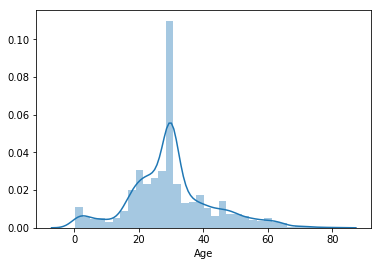

In [192]:
# Distribution of age, with an overlay of a density plot
age = df['Age']
age_dist = sns.distplot(age)

In [177]:
print(df['Ticket'].value_counts().sort_values(ascending=False))

CA. 2343              11
1601                   8
CA 2144                8
S.O.C. 14879           7
PC 17608               7
347082                 7
3101295                7
347077                 7
347088                 6
19950                  6
113781                 6
382652                 6
16966                  5
113503                 5
4133                   5
PC 17757               5
349909                 5
W./C. 6608             5
220845                 5
230136                 4
LINE                   4
C.A. 33112             4
36928                  4
PC 17755               4
113760                 4
W./C. 6607             4
PC 17760               4
12749                  4
SC/Paris 2123          4
17421                  4
                      ..
2690                   1
7540                   1
349214                 1
223596                 1
C.A. 31030             1
347078                 1
234686                 1
A/4 31416              1
112379                 1


In [83]:
df['Fare'].value_counts().sort_index(ascending=False)

512.3292     4
263.0000     6
262.3750     7
247.5208     3
227.5250     5
221.7792     4
211.5000     5
211.3375     4
164.8667     4
153.4625     3
151.5500     6
146.5208     3
136.7792     2
135.6333     4
134.5000     5
133.6500     2
120.0000     4
113.2750     3
110.8833     4
108.9000     3
106.4250     3
93.5000      4
91.0792      2
90.0000      5
89.1042      2
86.5000      3
83.4750      2
83.1583      6
82.2667      2
82.1708      2
            ..
7.6500       6
7.6292       2
7.5792       1
7.5750       1
7.5500       8
7.5208       1
7.4958       3
7.3125       1
7.2833       1
7.2500      18
7.2292      24
7.2250      21
7.1417       1
7.1250       4
7.0542       2
7.0500       9
7.0458       1
7.0000       2
6.9750       2
6.9500       2
6.8583       1
6.7500       2
6.4958       3
6.4500       1
6.4375       3
6.2375       1
5.0000       1
4.0125       1
3.1708       1
0.0000      17
Name: Fare, Length: 281, dtype: int64

In [96]:
df['Cabin'].value_counts() #(Since there are missing values, it's throwing an error)
new=[]
for i in df['Cabin']:
    print(i)
df['Cabin'].fillna(df['Cabin'])

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [85]:
df['Embarked'].value_counts() # Where the passengers boarded from, C = Cherbourg, Q = Queenstown, S = Southampton

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [86]:
df['Survived'].value_counts() # this is the prediction that the Alogrithm needs to figure out, and thereby only ~800, as the remaining is test data i.e. blank

0.0    549
1.0    342
Name: Survived, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Survived       891 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


In [88]:
# We filled the missing values in Age column with mean of the whole column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [89]:
df['Fare'].dropna(how='any',axis=0)

In [93]:
df.iloc[1043,8]=31.0

In [94]:
df.iloc[1043,]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                           31
Cabin                         NaN
Embarked                        S
Survived                      NaN
Name: 152, dtype: object

In [107]:
# We filled the missing values in Embarked, since it's categorical, and only 2-3 values were missing, we plainly used
# a forward fill (i.e. the data from the previous is filled to next row)
df['Embarked'].fillna(method='ffill',inplace=True) 

In [120]:
df['Cabin'].replace(np.nan,"No_Cabin",inplace=True)

In [123]:
df['Cabin'].value_counts()

No_Cabin           1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
D                     4
F33                   4
B96 B98               4
F4                    4
F2                    4
C78                   4
C22 C26               4
E101                  3
A34                   3
E34                   3
B51 B53 B55           3
C101                  3
B58 B60               3
C85                   2
C2                    2
F G73                 2
E31                   2
B28                   2
C7                    2
D36                   2
D35                   2
B69                   2
C46                   2
C54                   2
C89                   2
C123                  2
                   ... 
C105                  1
C97                   1
B4                    1
E77                   1
B73                   1
A26                   1
A19                   1
A7                    1
C128                  1
C50                   1
D11             

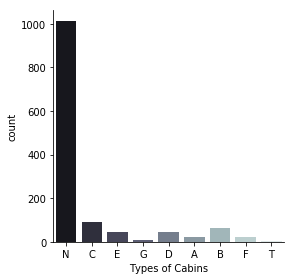

In [196]:
#  We picked out the first letter of the Cabin name from the list
a = []
for i in df['Cabin']:
    a.append(i[0])
# print(a)

df['Cabin1']=pd.DataFrame(a)
df.head(4)
df['Cabin1'].value_counts().sort_index()
fl = sns.factorplot('Cabin1',data=df,kind='count',palette='bone')
fl.set(xlabel='Types of Cabins')

In [ ]:
# Since we already transformed Cabin, we dropped Cabin row and replacement with Cabin1 in the next cell below
df.drop(['Cabin'],axis=1)

In [ ]:
df1 = df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
           'Parch', 'Ticket', 'Fare', 'Cabin1', 'Embarked','Survived']]

In [211]:
# IDentifying children and adding them to the list
def child_male_female(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

df1['person']=df[['Age','Sex']].apply(child_male_female,axis=1)

In [213]:
df1.head(10)

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   
7            8       3                     Palsson, Master. Gosta Leonard   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex        Age  SibSp  Parch            Ticket     Fare Cabin1 Embarked  \
0    male  22.000000      1      0         A/5 21171   7.2500      N        S   
1  female  38.000000      1      0          PC 17599  71.2833      C        C   
2  female  26.000000      0      0  STON/O2. 3101282   7.9250      N        S   
3  female  35.000000      1      0            113803  53.1000      C        S   
4    male  35.000000      0      0            373450   8.0500      N        S   
5    male  29.881138      0      0            330877   8.4583      N        Q   
6    male  54.000000      0      0             17463  51.8625      E        S   
7    male   2.000000      3      1            349909  21.0750      N        S   
8  female  27.000000      0      2            347742  11.1333      N        S   
9  female  14.000000      1      0            237736  30.0708      N        C   

   Survived  person  
0       0.0    male  
1       1.0  female  
2       1.0  female  
3       1.0  female  
4       0.0    male  
5       0.0    male  
6       0.0    male  
7       0.0   child  
8       1.0  female  
9       1.0   child

In [214]:
df1['person'].value_counts()

male      784
female    410
child     115
Name: person, dtype: int64

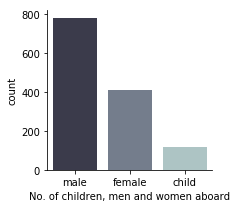

In [217]:
gf = sns.factorplot('person',data=df1,kind='count',palette='bone',size=3)
gf.set(xlabel='No. of children, men and women aboard')

In [218]:
df = df1[['PassengerId', 'Pclass', 'Name', 'person', 'Age', 'SibSp',
           'Parch', 'Ticket', 'Fare', 'Cabin1', 'Embarked','Survived']]

In [ ]:
df.drop(['Name','Ticket'],axis=1)

In [226]:
df.keys()

Index(['PassengerId', 'Pclass', 'person', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin1', 'Embarked', 'Survived'],
      dtype='object')

In [228]:
X = df[['PassengerId', 'Pclass', 'person','SibSp', 'Parch', 'Fare',
       'Cabin1', 'Embarked', 'Survived']]
y = df['Age']

In [239]:
X1 = X.iloc[:800,:]
y1 = y.iloc[:800]

In [240]:
X1.shape

(800, 9)

In [247]:
X1.head()

PassengerId  Pclass  person  SibSp  Parch     Fare Cabin1 Embarked  \
0            1       3    male      1      0   7.2500      N        S   
1            2       1  female      1      0  71.2833      C        C   
2            3       3  female      0      0   7.9250      N        S   
3            4       1  female      1      0  53.1000      C        S   
4            5       3    male      0      0   8.0500      N        S   

   Survived  
0       0.0  
1       1.0  
2       1.0  
3       1.0  
4       0.0

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
reg = LinearRegression()
labl = LabelEncoder()
enc = OneHotEncoder()

In [262]:
# We will have to use LabelEncoder first to get the various options into numerical format, 
# because the One hot encoder does not recognize categorical format and needs numeric numbers
X1 = X1.apply(LabelEncoder().fit_transform) 

In [267]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 9 columns):
PassengerId    800 non-null int64
Pclass         800 non-null int64
person         800 non-null int64
SibSp          800 non-null int64
Parch          800 non-null int64
Fare           800 non-null int64
Cabin1         800 non-null int64
Embarked       800 non-null int64
Survived       800 non-null int64
dtypes: int64(9)
memory usage: 62.5 KB
